# FLEE - a Restaurant Analisys

L'obiettivo di questo progetto è aiutare un possibile ristorante, nel capire come selezionare le giuste quantità di prodotti giorno dopo giorno. Fornire quindi all'interessato lo studio effettuato su dati delle vendite dei piatti. Dato uno speifico giorno e un piatto capire con quale quantità si ripresenterà il prossimo giorno selezionato. Il principale lavoro è quindi rivolto allo studio di una variabile continua, le quantità vendute di uno determinato prodotto.

In [3]:
import numpy as np
import pandas as pd
import os
import csv
import math
import matplotlib.pyplot as plt
import datetime as datetime

In [4]:
%matplotlib inline

I dati utilizzati son stati acquisiti da Kaggle.

Prelevo i dati e li inserisco nei seguenti data frame.

ORDERS -> al suo interno sono presenti tutti i dati relativi alle vendite effettuate negli anni dal 2015 al 2019, e le colonne 
          di interesse sono: il numero dell'ordine, la data in cui è stato emesso, il nome del prodotto venduto, la quantità, 
          il prezzo di listino, il totale dei prodotti venduti in un determinato ordine. Una partocolarità è che i numeri degli 
          ordini non sono univoci, vuole dire che ci possono essere più 'Order Number' uguali che indicano si lo stesso ordine 
          effettuato da un cliente, ma ogni riga del data frame specifica un diverso prodotto.
          
PRODUCTS -> questo data frame è il listino dei prodotti del ristorante con i relativi nomi dei prodotti e prezzi per unità.

In [5]:
orders = pd.read_csv(r"C:\\Users\\Tommi\\DataIntensiveProject\restaurant-1-orders.csv")
orders.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


In [6]:
products = pd.read_csv(r"C:\\Users\\Tommi\\DataIntensiveProject\restaurant-1-products-price.csv")
products.head()

,Item Name,Product Price
0,Mint Sauce,0.5
1,Lime Pickle,0.5
2,Mango Chutney,0.5
3,Red Sauce,0.5
4,Onion Chutney,0.5


L'attributo 'Order Date' che è un tipo Object, viene trasformanto in un tipo Date, in questo modo è possibile eseguire determinate operazioni su questo dato.

In [7]:
orders['Order Date'] =  pd.to_datetime(orders['Order Date'])
orders['Order Date'] = pd.to_datetime(orders['Order Date']).dt.normalize()

Il numero totale dei prodotti presenti nel ristorante.

In [8]:
len(orders["Item Name"].unique())

248

Si utilizza la funzione 'describe' su le colonne di interesse, tralasciando quelle non di valore per questa ricerca.

In [9]:
orders[["Quantity", "Product Price", "Total products"]].describe()

,Quantity,Product Price,Total products
count,74818.000000,74818.000000,74818.000000
mean,1.243564,5.286492,6.931434
std,0.798207,3.338221,3.954832
min,1.000000,0.500000,1.000000
25%,1.000000,2.950000,5.000000
50%,1.000000,3.950000,6.000000
75%,1.000000,8.950000,8.000000
max,51.000000,17.950000,60.000000


In [10]:
len(products)

248

Sommo le quantità relative ad un 'Item Name' e le aggiungo al dataFrame dei prodotti. Rappresento quindi la quantità totale di vendite dal 2015 al 2019 di ogni signolo prodotto.

In [11]:
for i in products['Item Name']:
    y = orders.loc[orders['Item Name'] == i, 'Quantity'].sum()
    products.loc[products['Item Name'] == i, 'Quantity'] = y
products.head()

,Item Name,Product Price,Quantity
0,Mint Sauce,0.5,1840.0
1,Lime Pickle,0.5,386.0
2,Mango Chutney,0.5,2504.0
3,Red Sauce,0.5,728.0
4,Onion Chutney,0.5,1291.0


Aggiungo al dataFrame dei prodotti il guadagno totale per ogni prodotto.

In [12]:
products['Earnings'] = products['Product Price'] * products['Quantity']
products.head()

,Item Name,Product Price,Quantity,Earnings
0,Mint Sauce,0.5,1840.0,920.0
1,Lime Pickle,0.5,386.0,193.0
2,Mango Chutney,0.5,2504.0,1252.0
3,Red Sauce,0.5,728.0,364.0
4,Onion Chutney,0.5,1291.0,645.5


In [13]:
products[['Product Price', 'Earnings']].describe()

,Product Price,Earnings
count,248.000000,248.000000
mean,7.981048,1794.590524
std,3.326234,2857.417340
min,0.500000,7.900000
25%,5.700000,340.525000
50%,8.950000,841.750000
75%,9.950000,1816.275000
max,17.950000,22133.350000


Ricerca sul prodotto più venduto.

In [14]:
products[products['Quantity'] == products['Quantity'].max()]

,Item Name,Product Price,Quantity,Earnings
5,Plain Papadum,0.8,10648.0,8518.4


Ricerca sul prodotto meno venduto.

In [15]:
products[products['Quantity'] == products['Quantity'].min()]

,Item Name,Product Price,Quantity,Earnings
88,Chicken Chaat Main,7.90,1.0,7.90
161,Tandoori Chicken,8.95,1.0,8.95
205,Mushroom - Prawn,9.95,1.0,9.95
215,Lamb Persian,10.95,1.0,10.95
245,Kurma,12.95,1.0,12.95


Ricerca del prodotto che ha portato più guadagni.

In [16]:
products[products['Earnings'] == products['Earnings'].max()]

,Item Name,Product Price,Quantity,Earnings
102,Chicken Tikka Masala,8.95,2473.0,22133.35


Ricerca del prodotto che ha portato meno guadagni.

In [17]:
products[products['Earnings'] == products['Earnings'].min()]

,Item Name,Product Price,Quantity,Earnings
88,Chicken Chaat Main,7.9,1.0,7.9


Grafico relativo alle vendite dei vari prodotti, rappresenta i guadagni totali per ogni prodotto. Si è in grado di capire a quale fascia di lusso appartiene il ristorante. Avendo maggiori guadagni nella prima fascia (bassa) di prezzi si potrebbe evincere che sia un ristrante economico.

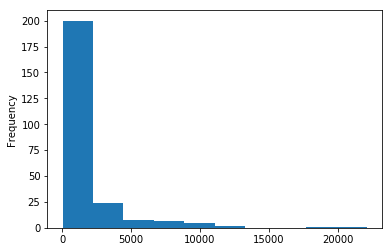

In [20]:
products["Earnings"].plot.hist()

Grafico relativo a quanti guadagni hanno portato prodotti a determinati prezzi.

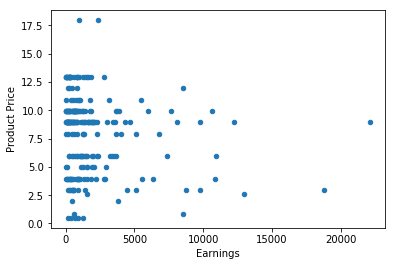

In [19]:
products.plot.scatter("Earnings", "Product Price")

Viene creato il data frame identificato da ogni ordine.

In [18]:
dateFrame = orders
dateFrame = dateFrame.reset_index()
dateFrame = dateFrame.set_index(['Order Date', 'Item Name'])
dateFrame = dateFrame.drop('index', 1)
dateFrame = dateFrame.drop('Order Number', 1)
dateFrame = dateFrame.drop('Total products', 1)
dateFrame['Earnings'] = dateFrame['Quantity'] * dateFrame['Product Price']
dateFrame.head()

Quantity  Product Price  Earnings
Order Date Item Name                                             
2019-03-08 Plain Papadum               2           0.80      1.60
           King Prawn Balti            1          12.95     12.95
           Garlic Naan                 1           2.95      2.95
           Mushroom Rice               1           3.95      3.95
           Paneer Tikka Masala         1           8.95      8.95

Colonna indicante quanto si è guadagnato in un determinato giorno.

In [19]:
dateFrame['TotEarnings'] = dateFrame.groupby(level=0)['Product Price'].transform('sum')

Ordinamento effettuato in base alla data.

In [20]:
dateFrame.sort_values(by=['Order Date'], inplace=True, ascending=True)
dateFrame.head()

Quantity  Product Price  Earnings  \
Order Date Item Name                                                   
2015-01-09 Onion Bhaji                    1           3.95      3.95   
2015-01-10 Tandoori Fish                  1           5.95      5.95   
           Tandoori Fish                  1           5.95      5.95   
           Tandoori Chicken (1/4)         1           4.95      4.95   
           Sheek Kehab                    2           5.95     11.90   

                                   TotEarnings  
Order Date Item Name                            
2015-01-09 Onion Bhaji                    3.95  
2015-01-10 Tandoori Fish                 99.65  
           Tandoori Fish                 99.65  
           Tandoori Chicken (1/4)        99.65  
           Sheek Kehab                   99.65

Ricerca delle vendite di un determinato prodotto.

In [21]:
All = slice(None)
dateFrame.loc[(All,'Sheek Kehab'),All]

Quantity  Product Price  Earnings  TotEarnings
Order Date Item Name                                                  
2015-01-10 Sheek Kehab         2           5.95     11.90        99.65
2016-03-17 Sheek Kehab         1           4.95      4.95       124.85
2016-03-18 Sheek Kehab         1           4.95      4.95       648.75
           Sheek Kehab         1           4.95      4.95       648.75
2016-03-19 Sheek Kehab         1           4.95      4.95       473.25

Identificate data minore e maggiore dal nostro set di dati.

In [22]:
maxDate = dateFrame.index.get_level_values('Order Date').max()
minDate = dateFrame.index.get_level_values('Order Date').min()
minDate = minDate.year
maxDate = maxDate.year

In [23]:
dateindex = dateFrame.index.get_level_values('Order Date')
dateindex = pd.DatetimeIndex(dateindex)
dateFrame.loc[(dateindex.year == minDate)].head()

Quantity  Product Price  Earnings  \
Order Date Item Name                                                   
2015-01-09 Onion Bhaji                    1           3.95      3.95   
2015-01-10 Tandoori Fish                  1           5.95      5.95   
           Tandoori Fish                  1           5.95      5.95   
           Tandoori Chicken (1/4)         1           4.95      4.95   
           Sheek Kehab                    2           5.95     11.90   

                                   TotEarnings  
Order Date Item Name                            
2015-01-09 Onion Bhaji                    3.95  
2015-01-10 Tandoori Fish                 99.65  
           Tandoori Fish                 99.65  
           Tandoori Chicken (1/4)        99.65  
           Sheek Kehab                   99.65

Ricavi totali.

In [24]:
All = slice(None)
dateFrame.loc[(All, All)].Earnings.sum()

446517.45

Raccoglimento dati da analizzare come: i ricavi totali per ogni anno, il totale delle quantità vendute ogni anno.

In [25]:
old = maxDate - minDate + 1
totalArr = np.zeros(old)
yearArr = np.zeros(old)
maxEarnArr = np.zeros(old)
minEarnArr = np.zeros(old)
tmp = np.zeros(old*2)
nameMaxArr = []
nameMinArr = []
quantityArr = np.zeros(old)
count = 0

for x in dateindex:
    if x.year == (minDate + count):
        
        totalArr[count] = dateFrame.loc[(dateindex.year == (minDate + count))].Earnings.sum()
        
        quantityArr[count] = dateFrame.loc[(dateindex.year == (minDate + count))].Quantity.sum()
        
        maxEarnArr[count] = dateFrame.loc[(dateindex.year == (minDate + count))].Earnings.max()

        c = dateFrame[dateFrame['Earnings'] == maxEarnArr[count]]
        c.reset_index(inplace=True)
        tmp = c['Item Name']
        nameMaxArr.append(tmp[0])
        
        minEarnArr[count] = dateFrame.loc[(dateindex.year == (minDate + count))].Earnings.min()

        c = dateFrame[dateFrame['Earnings'] == minEarnArr[count]]
        c.reset_index(inplace=True)
        tmp = c['Item Name']
        nameMinArr.append(tmp[0])
                
        yearArr[count] = minDate + count
        count+=1

Guadagni totali per ogni fine anno di attività.

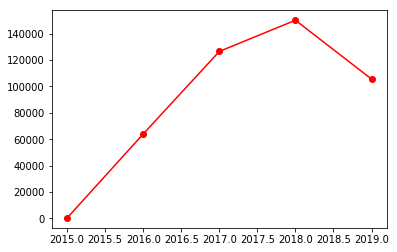

In [26]:
plt.plot(yearArr, totalArr, "ro-")

<BarContainer object of 5 artists>

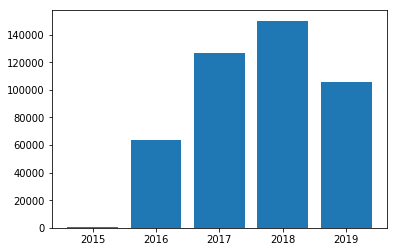

In [27]:
plt.bar(yearArr, totalArr)

Quantità totali vendute per ogni fine anno di attività.

<BarContainer object of 5 artists>

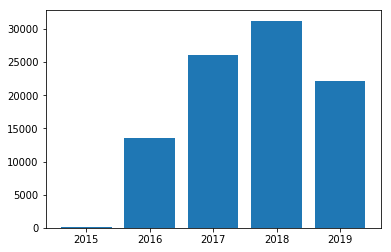

In [28]:
plt.bar(yearArr, quantityArr)

Messe a confronto quantità e ricavi.

Text(0, 0.5, 'Earnings')

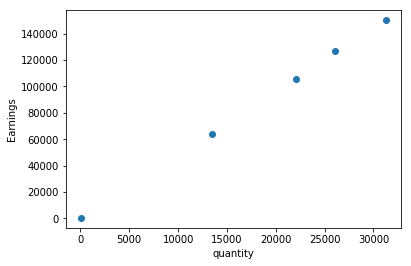

In [29]:
plt.scatter(quantityArr, totalArr)
plt.xlabel('quantity')
plt.ylabel('Earnings')

Per ogni anno scopro il massimo guadagno.

Text(0, 0.5, 'Max Earning')

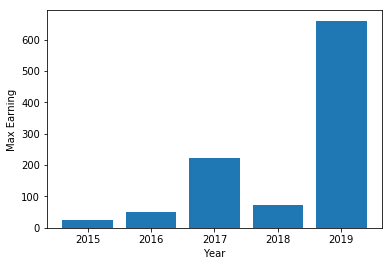

In [30]:
plt.bar(yearArr, maxEarnArr)
plt.xlabel('Year')
plt.ylabel('Max Earning')

([<matplotlib.patches.Wedge at 0x18422c28f28>,
 [Text(1.097100450604639, 0.07981604652636345, 'Tandoori Fish'),
  Text(1.0518225870368922, 0.32197708831377964, 'Butter Chicken'),
  Text(0.4677132913413287, 0.9956125135325798, 'Korma'),
  Text(-0.49097482400555775, 0.9843493903044344, 'House Red wine 75cl'),
  Text(-0.47302317042462233, -0.9931007402280188, 'King Prawn Shaslick')])

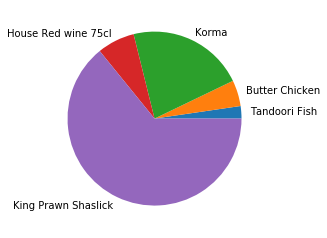

In [31]:
plt.pie(maxEarnArr, labels=nameMaxArr)

Per ogni anno il minimo guadagno.

Text(0, 0.5, 'Min Earning')

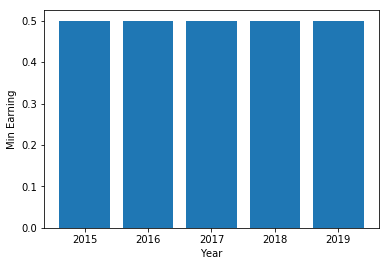

In [32]:
plt.bar(yearArr, minEarnArr)
plt.xlabel('Year')
plt.ylabel('Min Earning')

([<matplotlib.patches.Wedge at 0x18422cceda0>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Lime Pickle'),
  Text(-0.3399187231970732, 1.046162158377023, 'Lime Pickle'),
  Text(-1.0999999999999988, -5.149471622296949e-08, 'Lime Pickle'),
  Text(-0.33991862524830174, -1.0461621902025062, 'Lime Pickle'),
  Text(0.8899187482945414, -0.6465637025335375, 'Lime Pickle')])

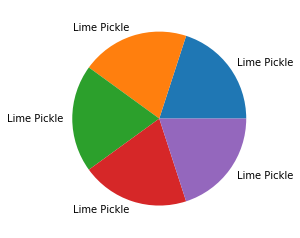

In [33]:
plt.pie(minEarnArr, labels=nameMinArr)

In [34]:
dateFrame.reset_index(inplace=True)
dateFrame.head()

,Order Date,Item Name,Quantity,Product Price,Earnings,TotEarnings
0,2015-01-09,Onion Bhaji,1,3.95,3.95,3.95
1,2015-01-10,Tandoori Fish,1,5.95,5.95,99.65
2,2015-01-10,Tandoori Fish,1,5.95,5.95,99.65
3,2015-01-10,Tandoori Chicken (1/4),1,4.95,4.95,99.65
4,2015-01-10,Sheek Kehab,2,5.95,11.90,99.65


Normalizzazione nome prodotti.

In [35]:
valArr = np.zeros(len(dateFrame))
valArrProd = np.zeros(len(products))
dateFrame.sort_values(by=['Item Name'], inplace=True, ascending=True)
products.sort_values(by=['Item Name'], inplace=True, ascending=True)
a = dateFrame['Item Name']
a = a.unique()
count = 0
c = 0

valArrProd[count] = 0
for i in dateFrame['Item Name']:
    if a[count] != i:
        count+=1
        valArrProd[count] = count
    valArr[c] = count
    c+=1
dateFrame['valueItem'] = valArr
products['valueItem'] = valArrProd

In [36]:
dateFrame.sort_values(by=['Order Date'], inplace=True, ascending=True)
dateFrame.reset_index(inplace=True)
dateFrame.head()

,index,Order Date,Item Name,Quantity,Product Price,Earnings,TotEarnings,valueItem
0,0,2015-01-09,Onion Bhaji,1,3.95,3.95,3.95,166.0
1,15,2015-01-10,Onion Chutney,1,0.50,0.50,99.65,167.0
2,6,2015-01-10,Vegetable Samosa,1,4.95,4.95,99.65,240.0
3,7,2015-01-10,Vegetable Samosa,1,4.95,4.95,99.65,240.0
4,17,2015-01-10,Paratha,1,2.95,2.95,99.65,175.0


Dal dataFrame selezioniamo tutte le date e tramite esse si trova qual'è il relativo giorno da aggiungere in una nuova colonna contenente i giorni settimanali. Grazie a questo passaggio si può iniziare uno studio basato sui singoli giorni settimanali.

In [37]:
dayArr = []
for i in dateFrame['Order Date']:
    df = pd.Timestamp(i)
    dayArr.append(df.weekday_name)
dateFrame['dayName'] = dayArr

C:\Users\Tommi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  after removing the cwd from sys.path.


In [38]:
dateFrame.head()

,index,Order Date,Item Name,Quantity,Product Price,Earnings,TotEarnings,valueItem,dayName
0,0,2015-01-09,Onion Bhaji,1,3.95,3.95,3.95,166.0,Friday
1,15,2015-01-10,Onion Chutney,1,0.50,0.50,99.65,167.0,Saturday
2,6,2015-01-10,Vegetable Samosa,1,4.95,4.95,99.65,240.0,Saturday
3,7,2015-01-10,Vegetable Samosa,1,4.95,4.95,99.65,240.0,Saturday
4,17,2015-01-10,Paratha,1,2.95,2.95,99.65,175.0,Saturday


Viene preso in esempio un solo giorno della settimana per compiere i necessari studi, in questo caso il Sabato.

In [39]:
Saturday = dateFrame.loc[dateFrame['dayName'] =='Saturday']

Quantità più alta venduta di sabato.

In [40]:
Saturday.loc[Saturday['Quantity'] == Saturday['Quantity'].max()]

,index,Order Date,Item Name,Quantity,Product Price,Earnings,TotEarnings,valueItem,dayName
20217,20221,2017-06-24,Plain Papadum,13,0.8,10.4,483.35,188.0,Saturday


E' preso come riferimento un unico giorno della settimana, in questo caso il sabato.

In [41]:
itemName = Saturday['Item Name'].loc[Saturday['Quantity'] == Saturday['Quantity'].max()].values[0]

Preso come riferimento un unico piatto dal menù, lo studio verrà eseguito su di esso.

In [42]:
ResearchFrame = Saturday.loc[Saturday['Item Name'] == itemName]
itemValue = ResearchFrame['valueItem'].unique()

Salvata in variabile la data di inizio e di fine registrata per il prodotto preso in studio.

In [43]:
startDate = ResearchFrame['Order Date'].loc[ResearchFrame['Order Date'] == ResearchFrame['Order Date'].min()].unique()
endDate = ResearchFrame['Order Date'].loc[ResearchFrame['Order Date'] == ResearchFrame['Order Date'].max()].unique()

In [44]:
startDate =  pd.to_datetime(startDate)
endDate = pd.to_datetime(endDate)
startDate

DatetimeIndex(['2016-01-09'], dtype='datetime64[ns]', freq=None)

Obiettivo di questo codice è l'aggiunta delle giornate, tra startDate e endDate, in cui il prodotto selezionato non è stato venduto. Si ceerca quindi di inserire nel dataframe la quantità 0 nelle giornate senza vendita. Questo passaggio serve per avere un più realistico studio del prodotto in quanto non è trascurabile per il nostro fine la conoscenza di questo dato.

Creazione di un nuovo dataframe in cui sono presenti tutti i sabati da startDate a endDate, hai quali viene assegnata quantità 0.

In [45]:
zeroFrame = pd.DataFrame(columns = ['Order Date', 'Quantity'])
while startDate < endDate:
    zeroFrame = zeroFrame.append([{'Order Date': startDate[0], 'Quantity': 0}])
    startDate += datetime.timedelta(days=7)


In [46]:
zeroFrame.head()

,Order Date,Quantity
0,2016-01-09,0
0,2016-01-16,0
0,2016-01-23,0
0,2016-01-30,0
0,2016-02-06,0


In [47]:
ResearchFrame = ResearchFrame.reset_index()
zeroFrame = zeroFrame.reset_index()

Merge tra i due dataframe. In questo modo ottieniamo un dataframe contenente tutti i dati relativi ai due dataframe. Si è cosi in grado di eliminare i giorni che manifestano quantità vendute uguale a 0 quando in realtà hanno una vendita maggiore.

In [48]:
result = pd.merge(zeroFrame,ResearchFrame, how='left', on=['Order Date'])

In [49]:
result.sort_values(by=['Order Date'], ascending=True).head()

,index_x,Order Date,Quantity_x,level_0,index_y,Item Name,Quantity_y,Product Price,Earnings,TotEarnings,valueItem,dayName
0,0,2016-01-09,0,194.0,190.0,Plain Papadum,4.0,0.8,3.2,84.30,188.0,Saturday
1,0,2016-01-16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2016-01-23,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2016-01-30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2016-02-06,0,560.0,570.0,Plain Papadum,2.0,0.8,1.6,150.95,188.0,Saturday


Eliminazione dei dati sbagliati. Ottenimento del giusto storico delle vendite del prodotto selezionato nella giornata di sabato.

In [50]:
result = result.drop(columns=['level_0', 'index_x', 'Quantity_x', 'index_y', 'Product Price', 'Earnings', 'TotEarnings', 'valueItem', 'dayName'])
result = result.fillna(0)
result.head()

,Order Date,Item Name,Quantity_y
0,2016-01-09,Plain Papadum,4.0
1,2016-01-16,0,0.0
2,2016-01-23,0,0.0
3,2016-01-30,0,0.0
4,2016-02-06,Plain Papadum,2.0


Raggruppamento delle date uguali in un unica riga la cui colonna delle quantità diventa la somma delle righe unificate.

In [51]:
result = result.groupby('Order Date', as_index=False)['Quantity_y'].sum()
result.head()

,Order Date,Quantity_y
0,2016-01-09,4.0
1,2016-01-16,0.0
2,2016-01-23,0.0
3,2016-01-30,0.0
4,2016-02-06,7.0


Normalizzazione della data tramite indicizzazione. Dato che la data di per se non è un valore che ci può offrire un'accuratezza, è necessario normalizzarla. L'operazione avviene tramite indicizzazione crescente per ogni data incontrata.

In [52]:
count = 0
dateVal = np.zeros(len(result))
for i in result['Order Date']:
    dateVal[count] = count
    count+=1

In [53]:
result['Date Value'] = dateVal

Dal grafico è possibile vedere come le quantità di un prodotto nel tempo sono variate. Non essendo un grafico lineare si può pensare che ci possa essere una correlazione tra il periodo e le quantità vendute di un prodotto.

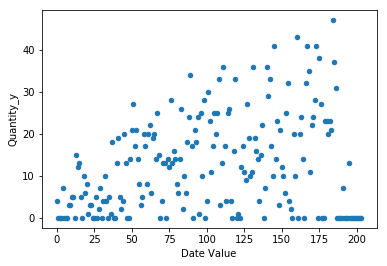

In [54]:
result.plot.scatter('Date Value', 'Quantity_y')

In [56]:
valQuantity = result['Quantity_y'].values
valDate = result['Date Value'].values

L'effettivo grado di accuratezza dei dati. 

In [57]:
np.mean((valQuantity-valQuantity.mean()) * (valDate-valDate.mean())) / (valQuantity.std() * valDate.std())

0.2557721511892455

Nelle prossime linee di codice provo a fare previsioni sulle quantità che saranno vendute in una data futura.

K-Fold Cross Validation. Con questa tecnica si suddividono i dati in training set e validation set, i primi con l'onere di addestrare il sistema i secondi come verifica dei suoi apprendimenti. La divisione dei dati è svolta tramite data e si mira ad insegnare al sistema a riconoscere la quantità venduta.

In [58]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(result, test_size=1/3, random_state=42)

In [59]:
X = result[["Date Value"]]
y = result["Quantity_y"]

In [60]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=42)

In [61]:
np.array_equal(X_train.index, y_train.index)

True

In [62]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

In [63]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Errore Relativo, indica il rapporto tra l'errore assoluto e il valore medio della serie.

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(y_val, lrm.predict(X_val))

124.52382209679857

In [66]:
X = result.drop(["Order Date"], axis=1)
y = result["Date Value"]

In [67]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [68]:
from sklearn.pipeline import Pipeline
prm = Pipeline([
("poly", PolynomialFeatures(degree=2, include_bias=False)),
("linreg", LinearRegression())
])

In [69]:
prm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Viene eseguita la predizione.

In [70]:
prm.predict([ [10], [5], [50] ])

array([ 2.40895156,  0.99660579, 11.48548199])

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform([[0.001, 4000],
[0.002, 2500],
[0.004, 1000]])

array([[-1.06904497,  1.22474487],
       [-0.26726124,  0.        ],
       [ 1.33630621, -1.22474487]])

In [72]:
from sklearn.pipeline import Pipeline
prm = Pipeline([
("poly", PolynomialFeatures(degree=2, include_bias=False)),
("linreg", LinearRegression())
])

In [73]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=42)

In [74]:
from sklearn.model_selection import cross_val_score
model = Pipeline([
("poly", PolynomialFeatures(degree=2, include_bias=False)),
("scale", StandardScaler()),
("linreg", LinearRegression())
])
scores = cross_val_score(model, X, y, cv=kf)

In [75]:
scores

array([1., 1., 1., 1., 1.])

In [76]:
scores.mean(), scores.std()

(1.0, 0.0)

Concludo dicendo che i risultati ottenuti non sono soddisfacenti come si sperava, sin dal calcolo numerico dell'accuratezza lo si poteva pensare. E' possibile che l'errore sia dovuto alla poco significativa normalizzazione della data oppure sin da principio, proprio dal fatto che data e quantità non sono correllate.